### **What is Natural Language Processing?**

Natural Language Processing (NLP in short) is a branch of artificial intelligence that deals with analyzing, understanding and generating the languages that humans use naturally in order to interface with computers in both written and spoken contexts using natural human languages instead of computer languages. Some of the common use case of NLP in machine learning are: 

- **Topic discovery and modeling:** Capture the meaning and themes in text collections, and apply advanced modeling techniques such as Topic Modeling to group similar documents together.
- **Sentiment Analysis:** Identifying the mood or subjective opinions within large amounts of text, including average sentiment and opinion mining.
- **Document summarization:** Automatically generating synopses of large bodies of text.
- **Speech-to-text and text-to-speech conversion:** Transforming voice commands into written text, and vice versa.
- **Machine translation:** Automatic translation of text or speech from one language to another.  

__[Learn More about Natural Language Processing](https://en.wikipedia.org/wiki/Natural_language_processing)__

### **Tasks to be performed:**

- Download the dataset from dropbox and install dependencies
- Import the required libraries and load the dataset 
- Perfom Exploratory Data Analysis (EDA) on the data set
- Use SpaCy to implement:
 - **Tokenization**
 - **Part of Speech Tagging**
 - **Stopwords removal**
 - **Lemmatization**
 - **Dependency Parsing**
 - **Named Entity Recognition**
- Implement Text Summarization Using **Gensim**
- Use **PyCaret** to implement NLP


#### *Importing Required Libraries*

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set()

import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
print("Libraries Imported")

Libraries Imported


In [2]:
df = pd.read_csv(r"C:\Users\Shivani Dussa\Downloads\Reviews.csv")
print(df.shape)
df.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [4]:
print(df.loc[0,'Summary'])    # with 0 index Summary 0 index is Good Qlty Dog Food
print(df.loc[1,'Summary'])    # with 1 index 

Good Quality Dog Food
Not as Advertised


In [5]:
print(df.loc[0,'Text'])
print("_______________________________________________________________________________________________________________________")
print(df.loc[0,'Score'])

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
_______________________________________________________________________________________________________________________
5


### Exploratory Data Analysis

In [37]:
#msno.matrix(df)

<AxesSubplot:>

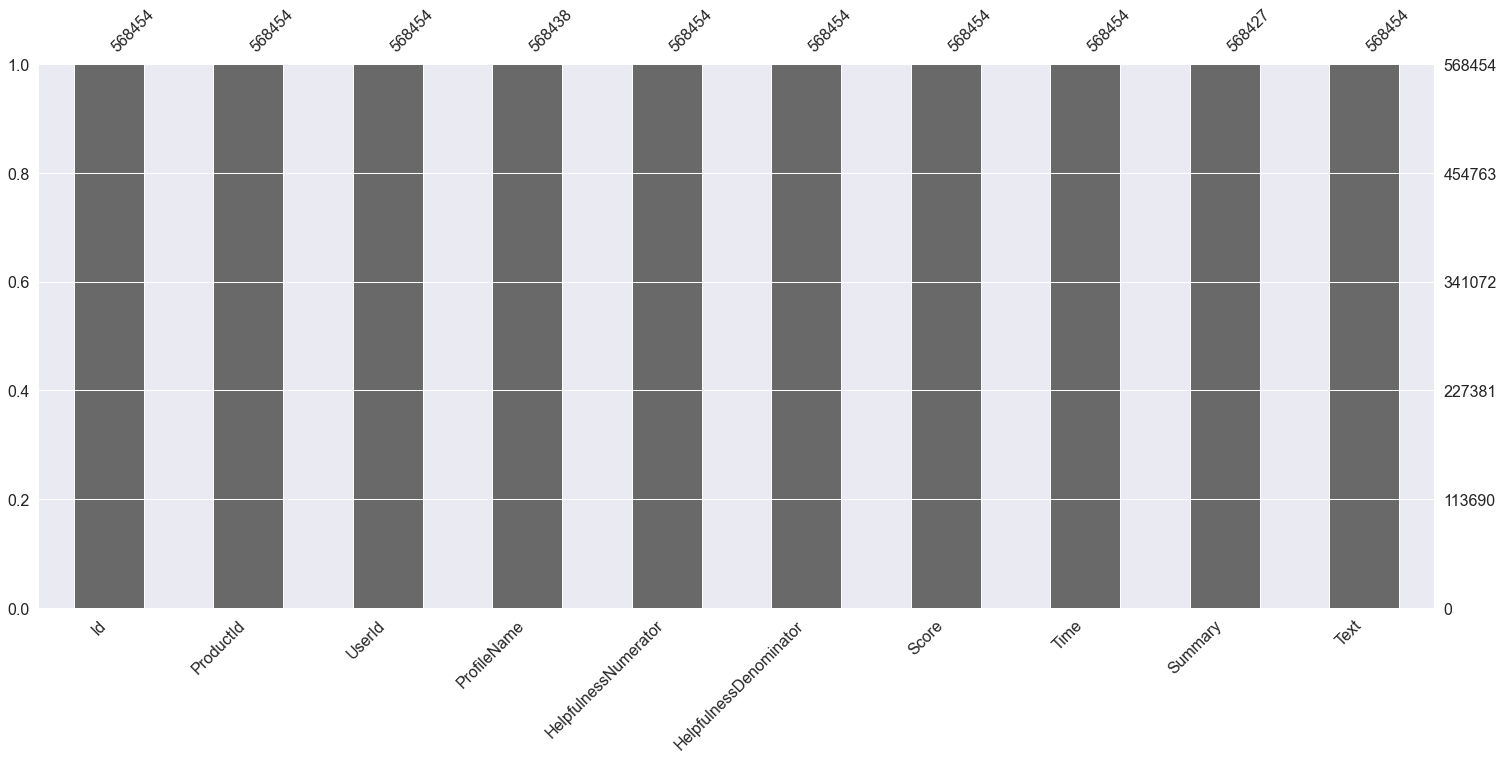

In [36]:
msno.bar(df)

In [3]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

**Analyse the data using sweetviz**


**Sweetviz** is an open source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with a single line of code. **Output** is a fully self-contained **HTML** application.

The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks.

**[Click Here!](https://pypi.org/project/sweetviz/)** to learn more about Sweetviz

In [44]:
#installing the Sweetviz
!pip install sweetviz

In [3]:
#importing sweetviz
import sweetviz as sv

# Analysing the dataset
report = sv.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [4]:
#display the report 
report.show_html('Output.html')

Report Output.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [5]:
df = df[['Text','Score']].dropna()    # dropna gives only columns u give

In [7]:
df.head()            # score means rating here 5,4,3,2,1

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [6]:
df.Text[1]   # Here its a negitive rating '1'

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [7]:
df.Score.value_counts()    # Rating values are 5,4,3,2   ratings 5 has more 

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

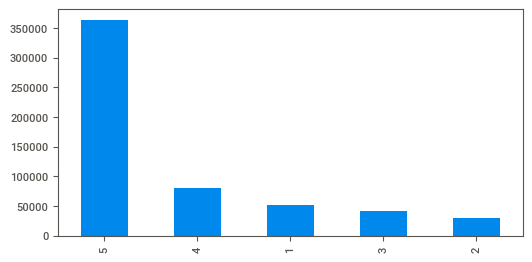

In [8]:
plt.figure(figsize =(6,3))
df.Score.value_counts().plot(kind = 'bar')
plt.show()              # 5 star rtings are more comparing to others

- **Observation:**
- The Above bar chart shows that the ratings system, Here, we have more 5 star ratings so, this cause unbalanced data
- Let us treat with rating 5 and 4 are positive response and rest are negitive reviews

In [9]:
df.Score[df.Score<=3]=0   # less than 3 are negitive '0'

df.Score[df.Score>=4]=1   # ratings 4 and 5 are positive '1'

C:\Users\Shivani Dussa\AppData\Local\Temp\ipykernel_17624\3821507089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Score[df.Score<=3]=0   # less than 3 are negitive '0'
C:\Users\Shivani Dussa\AppData\Local\Temp\ipykernel_17624\3821507089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Score[df.Score>=4]=1   # ratings 4 and 5 are positive '1'


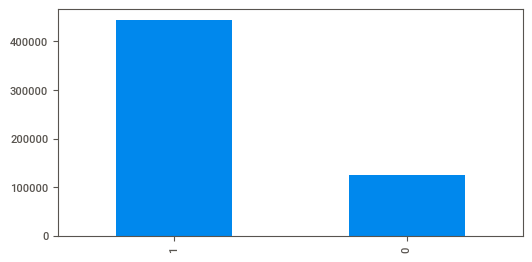

In [10]:
plt.figure(figsize = (6,3))
df.Score.value_counts().plot(kind = 'bar')
plt.show()

In [11]:
df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


### Linguistic features: 

- **Tokenization**
- **Part-of-speech tagging**
- **Dependency parsing**
- **Lemmatization**
- **Named Entities Recognition**
- **Visualization using spacy.displacy and explacy**


In [12]:
import spacy
from spacy.matcher import Matcher
from spacy.tokens import Span
from spacy import displacy

# Loading English Language Model
# A language model is a statistical model that let us perform NLP tasks such as POS-tagging and NER- tagging
#POS = Parts Of Speech
#NER = Name Entity Recognization

nlp = spacy.load('en_core_web_sm')

In [13]:
print(df.shape)
df.head()

(568454, 2)


,Text,Score
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [14]:
df.Text[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [15]:
# Loading Random tweet from dataset
review1 = df.Text[24]
print('Random Review:\n',review1)

Random Review:
 I have lived out of the US for over 7 yrs now, and I so miss my Twizzlers!!  When I go back to visit or someone visits me, I always stock up.  All I can say is YUM!<br />Sell these in Mexico and you will have a faithful buyer, more often than I'm able to buy them right now.


In [56]:
df.Text[24]

"I have lived out of the US for over 7 yrs now, and I so miss my Twizzlers!!  When I go back to visit or someone visits me, I always stock up.  All I can say is YUM!<br />Sell these in Mexico and you will have a faithful buyer, more often than I'm able to buy them right now."

In [16]:
#calling the nlp() on a string and spaCy tokenizes the text and creates a document object
doc = nlp(review1)
print(type(doc))

<class 'spacy.tokens.doc.Doc'>


___
- Tokenization
- Lemmatization
- POS Tagging
- Dependency Parsing
___

In [17]:
Review1TokenList = review1.split()    # Here I'm splitting the words(token)
print(Review1TokenList)

['I', 'have', 'lived', 'out', 'of', 'the', 'US', 'for', 'over', '7', 'yrs', 'now,', 'and', 'I', 'so', 'miss', 'my', 'Twizzlers!!', 'When', 'I', 'go', 'back', 'to', 'visit', 'or', 'someone', 'visits', 'me,', 'I', 'always', 'stock', 'up.', 'All', 'I', 'can', 'say', 'is', 'YUM!<br', '/>Sell', 'these', 'in', 'Mexico', 'and', 'you', 'will', 'have', 'a', 'faithful', 'buyer,', 'more', 'often', 'than', "I'm", 'able', 'to', 'buy', 'them', 'right', 'now.']


In [18]:
tokenized_text = pd.DataFrame()

for i,token in enumerate(doc):
    tokenized_text.loc[i,'text'] = token.text
    tokenized_text.loc[i,'lemma'] = token.lemma_     # it gives root word 
    tokenized_text.loc[i,'pos'] = token.pos_         # tells the parts of speech of each word
    tokenized_text.loc[i,'tag'] = token.tag_         # give pos tag
    tokenized_text.loc[i,'dep'] = token.dep_         # dependency document 
    tokenized_text.loc[i,'shape'] = token.shape_       # shape of words
    tokenized_text.loc[i,'is_alpha'] = token.is_alpha     # alphabets says true else are false
    tokenized_text.loc[i,'is_stop'] = token.is_stop           # stopwords
    tokenized_text.loc[i,'is_punctuation'] = token.is_punct   # says where punctuation has True otherwise False.
    tokenized_text.loc[i,'entity'] = token.ent_type_            # entity names for countries,dates....
    
tokenized_text[:20]

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop,is_punctuation,entity
0,I,I,PRON,PRP,nsubj,X,True,True,False,
1,have,have,AUX,VBP,aux,xxxx,True,True,False,
2,lived,live,VERB,VBN,ROOT,xxxx,True,False,False,
3,out,out,ADP,IN,prep,xxx,True,True,False,
4,of,of,ADP,IN,prep,xx,True,True,False,
5,the,the,DET,DT,det,xxx,True,True,False,
6,US,US,PROPN,NNP,pobj,XX,True,True,False,GPE
7,for,for,ADP,IN,prep,xxx,True,True,False,
8,over,over,ADP,IN,quantmod,xxxx,True,True,False,
9,7,7,NUM,CD,nummod,d,False,False,False,


In [20]:
tokenized_text.dep

0      nsubj
1        aux
2       ROOT
3       prep
4       prep
       ...  
64     xcomp
65      dobj
66    advmod
67    advmod
68     punct
Name: dep, Length: 69, dtype: object

In [21]:
tokenized_text.lemma.tail()  # it lemmetized that 24 index text, it have 68 words

64      buy
65     they
66    right
67      now
68        .
Name: lemma, dtype: object

In [22]:
df.Text[24]

"I have lived out of the US for over 7 yrs now, and I so miss my Twizzlers!!  When I go back to visit or someone visits me, I always stock up.  All I can say is YUM!<br />Sell these in Mexico and you will have a faithful buyer, more often than I'm able to buy them right now."

In [23]:
tokenized_text.iloc[:,4]   # all rows and 4th column 

0      nsubj
1        aux
2       ROOT
3       prep
4       prep
       ...  
64     xcomp
65      dobj
66    advmod
67    advmod
68     punct
Name: dep, Length: 69, dtype: object

### Visualizing entities using display

In [24]:
spacy.displacy.render(doc, style = 'ent',jupyter = True)

In [25]:
doc = nlp(review1)
spacy.displacy.render(doc,style = 'ent',jupyter = True)

In [26]:
tokenized_text

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop,is_punctuation,entity
0,I,I,PRON,PRP,nsubj,X,True,True,False,
1,have,have,AUX,VBP,aux,xxxx,True,True,False,
2,lived,live,VERB,VBN,ROOT,xxxx,True,False,False,
3,out,out,ADP,IN,prep,xxx,True,True,False,
4,of,of,ADP,IN,prep,xx,True,True,False,
...,...,...,...,...,...,...,...,...,...,...
64,buy,buy,VERB,VB,xcomp,xxx,True,False,False,
65,them,they,PRON,PRP,dobj,xxxx,True,True,False,
66,right,right,ADV,RB,advmod,xxxx,True,False,False,
67,now,now,ADV,RB,advmod,xxx,True,True,False,


In [27]:
spacy.explain('GPE')

'Countries, cities, states'

In [28]:
spacy.explain('DATE')

'Absolute or relative dates or periods'

In [29]:
entities = ['GPE','DATE','CARDINAL','PERSON']
for i in entities:
    print(i,':',spacy.explain(i))

GPE : Countries, cities, states
DATE : Absolute or relative dates or periods
CARDINAL : Numerals that do not fall under another type
PERSON : People, including fictional


### Visualizing dependency parsing using displacy

In [30]:
spacy.displacy.render(doc,style = 'dep',jupyter = True,options={'distance':140})

### Visualizing using **Explacy**

In [41]:
spacy.load('en_core_web_sm')

In [ ]:
!wget https://raw.githubusercontent.com/tylerneylon/explacy/master/explacy.py

### Text Summarization: **Gensim**

- When you open news sites, do you just start reading every news article? Probably not. 
- We typically glance the short news summary and then read more details if interested. Short, informative summaries of the news is now everywhere like magazines, news aggregator apps, research sites, etc.

- It is possible to create the summaries automatically as the news comes in from various sources around the world.

- The method of extracting these summaries from the original huge text without losing vital information is called as **Text Summarization**. 

- **Google News**, **inshorts app** and various other news aggregator apps take advantage of text summarization algorithms.




[**Click Here!**](https://www.machinelearningplus.com/nlp/text-summarization-approaches-nlp-example/) to learn more about Text Summarization

### Types of Text Summarization 
  **Two main methods of Text Summarization**
- Extractive
- Abstractive 

#### Importing Required libraries and installing dependencies

In [1]:
import wikipedia

In [2]:
import gensim
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords

C:\Users\Shivani Dussa\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### Text Summarization Using Gensim

In [3]:
wikisearch = wikipedia.page("A. P. J. Abdul Kalam")
wikicontent = wikisearch.content
print(wikicontent)

Avul Pakir Jainulabdeen Abdul Kalam ( (listen); 15 October 1931 – 27 July 2015) was an Indian aerospace scientist who served as the 11th president of India from 2002 to 2007. He was born and raised in Rameswaram, Tamil Nadu and studied physics and aerospace engineering. He spent the next four decades as a scientist and science administrator, mainly at the Defence Research and Development Organisation (DRDO) and Indian Space Research Organisation (ISRO) and was intimately involved in India's civilian space programme and military missile development efforts. He thus came to be known as the Missile Man of India for his work on the development of ballistic missile and launch vehicle technology. He also played a pivotal organisational, technical, and political role in India's Pokhran-II nuclear tests in 1998, the first since the original nuclear test by India in 1974.Kalam was elected as the 11th president of India in 2002 with the support of both the ruling Bharatiya Janata Party and the t

In [6]:
#Getting wikipedia information

wikisearch = wikipedia.page("A. P. J. Abdul Kalam")
wikicontent = wikisearch.content

#Loading the nlp core
nlp = spacy.load("en_core_web_sm")
doc = nlp(wikicontent)

#summary 0.2% of the original content
summ_per = summarize(wikicontent,ratio = 0.02)
print("Percentagewise Summary\n")
print(summ_per)

Percentagewise Summary

Avul Pakir Jainulabdeen Abdul Kalam ( (listen); 15 October 1931 – 27 July 2015) was an Indian aerospace scientist who served as the 11th president of India from 2002 to 2007.
Avul Pakir Jainulabdeen Abdul Kalam was born on 15 October 1931, to a Tamil Muslim family in the pilgrimage centre of Rameswaram on Pamban Island, then in the Madras Presidency and now in the State of Tamil Nadu.
In 1969, Kalam was transferred to the Indian Space Research Organisation (ISRO) where he was the project director of India's first Satellite Launch Vehicle (SLV-III) which successfully deployed the Rohini satellite in near-earth orbit in July 1980; Kalam had first started work on an expandable rocket project independently at DRDO in 1965.
He also took the controversial decision to impose President's Rule in Bihar in 2005.In September 2003, in an interactive session in PGI Chandigarh, Kalam supported the need of Uniform Civil Code in India, keeping in view the population of the coun

In [8]:
summ_words = summarize(wikicontent,word_count = 100)

print("----------------------------------------------------------------------------------------------------------------------")
print("word out summary\n")
print(summ_words)

----------------------------------------------------------------------------------------------------------------------
word out summary

Avul Pakir Jainulabdeen Abdul Kalam ( (listen); 15 October 1931 – 27 July 2015) was an Indian aerospace scientist who served as the 11th president of India from 2002 to 2007.
I join our Indo–Canadian families, friends, and neighbours in mourning the passing of this respected leader." United States President Barack Obama extended "deepest condolences to the people of India on the passing of former Indian President Dr. APJ Abdul Kalam", and highlighted his achievements as a scientist and as a statesman, notably his role in strengthening US–India relations and increasing space co-operation between the two nations.


In [10]:
import spacy
from spacy.matcher import Matcher
from spacy.tokens import Span
from spacy import displacy

In [12]:
APJ_Kalam= nlp(summ_words)
print(type(APJ_Kalam))

<class 'spacy.tokens.doc.Doc'>


In [14]:
TokenList = summ_words.split()    # Here I'm splitting the words(token)
print(TokenList)

['Avul', 'Pakir', 'Jainulabdeen', 'Abdul', 'Kalam', '(', '(listen);', '15', 'October', '1931', '–', '27', 'July', '2015)', 'was', 'an', 'Indian', 'aerospace', 'scientist', 'who', 'served', 'as', 'the', '11th', 'president', 'of', 'India', 'from', '2002', 'to', '2007.', 'I', 'join', 'our', 'Indo–Canadian', 'families,', 'friends,', 'and', 'neighbours', 'in', 'mourning', 'the', 'passing', 'of', 'this', 'respected', 'leader."', 'United', 'States', 'President', 'Barack', 'Obama', 'extended', '"deepest', 'condolences', 'to', 'the', 'people', 'of', 'India', 'on', 'the', 'passing', 'of', 'former', 'Indian', 'President', 'Dr.', 'APJ', 'Abdul', 'Kalam",', 'and', 'highlighted', 'his', 'achievements', 'as', 'a', 'scientist', 'and', 'as', 'a', 'statesman,', 'notably', 'his', 'role', 'in', 'strengthening', 'US–India', 'relations', 'and', 'increasing', 'space', 'co-operation', 'between', 'the', 'two', 'nations.']


In [15]:
tokenized_text = pd.DataFrame()

for j,token in enumerate(APJ_Kalam):
    tokenized_text.loc[j,'text'] = token.text
    tokenized_text.loc[j,'lemma'] = token.lemma_     # it gives root word 
    tokenized_text.loc[j,'pos'] = token.pos_         # tells the parts of speech of each word
    tokenized_text.loc[j,'tag'] = token.tag_         # give pos tag
    tokenized_text.loc[j,'dep'] = token.dep_         # dependency document 
    tokenized_text.loc[j,'shape'] = token.shape_       # shape of words
    tokenized_text.loc[j,'is_alpha'] = token.is_alpha     # alphabets says true else are false
    tokenized_text.loc[j,'is_stop'] = token.is_stop           # stopwords
    tokenized_text.loc[j,'is_punctuation'] = token.is_punct   # says where punctuation has True otherwise False.
    tokenized_text.loc[j,'entity'] = token.ent_type_            # entity names for countries,dates....
    
tokenized_text[:20]

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop,is_punctuation,entity
0,Avul,Avul,PROPN,NNP,compound,Xxxx,True,False,False,
1,Pakir,Pakir,PROPN,NNP,compound,Xxxxx,True,False,False,
2,Jainulabdeen,Jainulabdeen,PROPN,NNP,compound,Xxxxx,True,False,False,
3,Abdul,Abdul,PROPN,NNP,compound,Xxxxx,True,False,False,PERSON
4,Kalam,Kalam,PROPN,NNP,nsubj,Xxxxx,True,False,False,PERSON
5,(,(,PUNCT,-LRB-,punct,(,False,False,True,
6,(,(,PUNCT,-LRB-,punct,(,False,False,True,
7,listen,listen,VERB,VB,appos,xxxx,True,False,False,
8,),),PUNCT,-RRB-,punct,),False,False,True,
9,;,;,PUNCT,:,punct,;,False,False,True,


In [16]:
tokenized_text.tail()

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop,is_punctuation,entity
113,between,between,ADP,IN,prep,xxxx,True,True,False,
114,the,the,DET,DT,det,xxx,True,True,False,
115,two,two,NUM,CD,nummod,xxx,True,True,False,CARDINAL
116,nations,nation,NOUN,NNS,pobj,xxxx,True,False,False,
117,.,.,PUNCT,.,punct,.,False,False,True,


In [17]:
tokenized_text.dep

0      compound
1      compound
2      compound
3      compound
4         nsubj
         ...   
113        prep
114         det
115      nummod
116        pobj
117       punct
Name: dep, Length: 118, dtype: object

In [22]:
tokenized_text.iloc[:, 9]

0              
1              
2              
3        PERSON
4        PERSON
         ...   
113            
114            
115    CARDINAL
116            
117            
Name: entity, Length: 118, dtype: object

In [23]:
#visualizing the entity names using displacy
spacy.displacy.render(APJ_Kalam, style = 'ent',jupyter = True)

In [27]:
entity_names = ['PERSON','GPE','NORP','ORDINAL','CARDINAL','DATE']
for j in entity_names:
    print(j,':-',spacy.explain(j))

PERSON :- People, including fictional
GPE :- Countries, cities, states
NORP :- Nationalities or religious or political groups
ORDINAL :- "first", "second", etc.
CARDINAL :- Numerals that do not fall under another type
DATE :- Absolute or relative dates or periods


The parameters are:

- **ratio**: It can take values between 0 to 1. It represents the proportion of the summary compared to the original text.

- **word_count**: It decides the no of words in the summary.